# CP1 Blatt6 Abgabe Lapp & Brieden
erstellt von Tobias Lapp und Sven Brieden am 30.11.2017
## Aufgabe 6.1 Many body equilibria in 2d


|    |            |  |
|----------|:-------------:|------:|
| harmonic potential |  $V_h = \dfrac{\vec{x}^2}{2}$ | in the code its the function `Vp` |
| repulsive potential |    $V_{12}(\vec{x}_1 , \vec{x}_2 ) = − \text{log}\lVert\vec{x_1} − \vec{x_2}\rVert$   |in the code its the function `Vpp`    |
| the resulting potential for particle i | $V(\vec{x_i}) = \vec{x_i}^2\cdot 0.5 + \sum^N_{i\neq j}- \text{log}\lVert\vec{x_i} -\vec{x_j}\rVert$ |    in the code its the function `V` |

In [508]:
Vp = lambda x: np.linalg.norm(x)**2 / 2
Vpp = lambda x1, x2: -np.log(np.linalg.norm(x1-x2))  
def V(neue_position, particle_nr, dim):
    position = x_liste[i,particle_nr]
    position[dim] = neue_position
    V = Vp(position)
    for particle in range(N):
        if particle != particle_nr:
            V += Vpp(position, x_liste[i, particle]) 
    return V
def Main2(N):                            # iterating over 2,3,4 number of particles
    x_liste = np.random.rand(N,2)*2 -1       # startingpoins for all particles
    iterations = int(N * N /2)               # iterations to find the equilibria of many body
    
    for i in range(iterations):           
        for p in range(N):
            x_liste[p,0] = fmin(V,x_liste[p,0],args=(p,0,))
            x_liste[p,1] = fmin(V,x_liste[p,1],args=(p,1,))

    print("Die Distanz zum Mittelpunkt ist bei %i Teilchen gemittelt: %.4f"%(N,np.mean([np.linalg.norm(x_liste[-1,o]) for o in range(N)])))            
    plot_3d_special()

Die Distanz zum Mittelpunkt ist bei 2 Teilchen gemittelt: 0.6998


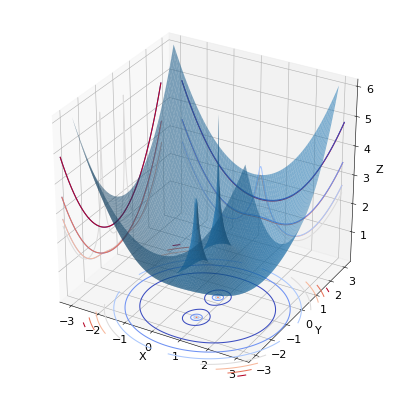

In [509]:
Many_body_equilibria_in_2d(2)

Die Distanz zum Mittelpunkt ist bei 3 Teilchen gemittelt: 1.0000


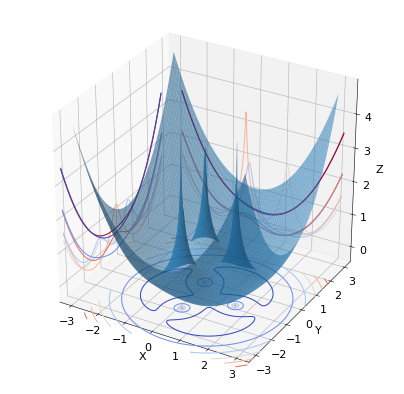

In [510]:
Many_body_equilibria_in_2d(3)

Die Distanz zum Mittelpunkt ist bei 4 Teilchen gemittelt: 1.2251


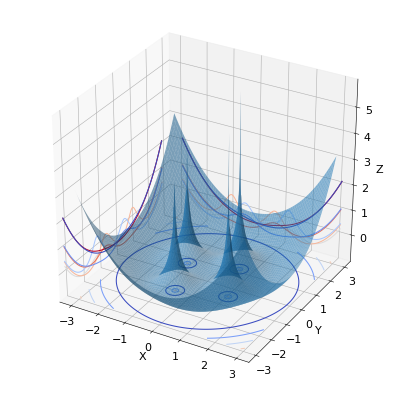

In [511]:
Many_body_equilibria_in_2d(4)

## Aufgabe 6.2. LU decomposition for tridiagonal matrices

In [ ]:
#A=(a c 0 0) = L * U
#   b a c 0
#   0 b a c
#   0 0 b a
size = 10#Size of tridiagonal quare matrix mxm
A= scipy.zeros((size,size)) #Matrix mit Nullen
L= scipy.zeros((size,size))
U= scipy.zeros((size,size))

b= np.zeros(10)
b[0]=1

In [ ]:
#Erstellen der Ausgangsmatrix A
for z in range(size):   # Zeilen
   for i in range(size): # Spalten
       if z==i:
           A[z][i]=2   # Hauptdiagonale ai
       if z==i-1:
           A[z][i]=-1  # obere Diagonale ci
       if z==i+1:
           A[z][i]=-1  # untere Diagonale bi

da = np.zeros(size)
dc = np.zeros(size)
db = np.zeros(size)

In [ ]:
# indizes der diagonalenelemente
ai=0
bi=1
ci=1

#Speichern der relevanten diagonalen von A
for z in range(size):   # Zeilen
   for i in range(size): # Spalten
       if z==i:
           da[ai] = A[z][i]   # Hauptdiagonale ai
           ai=ai+1           
       if z==i-1:
           dc[ci] = A[z][i]  # obere Diagonale ci
           ci=ci+1
       if z==i+1:
           db[bi] = A[z][i]  # untere Diagonale bi
           bi=bi+1

In [ ]:
# diagonalen von L und U die keine Nullen enthalten
L_u = np.zeros(size)
U_m = np.zeros(size)
U_o = np.zeros(size)

# Berechnung der Elemente der L-und U-Diagonalen
U_m[0]=da[0]

for i in range(1,size):
    L_u[i] = db[i]/U_m[i-1] 
    U_m[i] = da[i]-L_u[i]*dc[i-1]

# indizes der diagonalenelemente
li=1
ui=0
ci=1

In [ ]:
#Füllen der L und U Matrizen
for z in range(size):   
   for i in range(size): 
       if z==i:
           L[z][i]=1   # Hauptdiagonale      
           U[z][i]=U_m[ui]
           ui=ui+1
       if z==i-1:
           U[z][i] = dc[ci]    # obere Diagonale 
           ci=ci+1
       if z==i+1:
           L[z][i]= L_u[li]  # untere Diagonale 
           li=li+1

In [ ]:
#Berechnung mit L U
y = scipy.zeros(size)
x = scipy.zeros(size)

for i in range(size):
    y[i] = b[i]
    for k in range(i):
        y[i] -= L[i,k]*y[k]     

for i in range(size-1,-1,-1):
    x[i] = y[i]
    for k in range(i+1,size):
        x[i] -= U[i,k]*x[k]
    x[i] *= 1./U[i,i]

In [515]:
  
print("Lösung mit L-U-Zerlegung:"), print(x), print("\n Benutzung von Solve mit A und b:")
print(scipy.linalg.solve(A,b))

A_dec=np.dot(L,U)
print("\n Fehler bei Zerlegung, da Element A[1,1]falsch:"), print(A_dec)
print("L = "),print(L)
print("\n U = "),print(U)

Lösung mit L-U-Zerlegung:
[ 0.725  0.45   0.4    0.35   0.3    0.25   0.2    0.15   0.1    0.05 ]

 Benutzung von Solve mit A und b:
[ 0.90909091  0.81818182  0.72727273  0.63636364  0.54545455  0.45454545
  0.36363636  0.27272727  0.18181818  0.09090909]

 Fehler bei Zerlegung, da Element A[1,1]falsch:
[[ 2.  -1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.   2.5 -1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   2.  -1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   2.  -1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   2.  -1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   2.  -1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   2.  -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   2.  -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   2.  -1. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   2. ]]
L = 
[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.5         1.          0.          0. 

(None, None)